In [63]:
import pandas as pd
import numpy as np
import io
import requests
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [31]:
def format_mth(mth):
    mth = mth.drop(mth.index[:4])
    mth.columns = ['Year', 'Avg Temp']
    mth['Year'] = mth['Year'].str[:4].astype(int)
    mth['Avg Temp'] = mth['Avg Temp'].apply(lambda x: (float(x)-32)*(5/9))
    return mth

In [32]:
april=pd.read_csv('262-tavg-1-4-1950-2019.csv')
april = april.drop(' April', axis=1)
april = format_mth(april)
april

,Year,Avg Temp
4,1950,6.611111
5,1951,8.111111
6,1952,10.388889
7,1953,7.833333
8,1954,12.000000
...,...,...
69,2015,11.611111
70,2016,10.888889
71,2017,12.222222
72,2018,6.000000


In [37]:
may=pd.read_csv('262-tavg-1-5-1950-2019.csv')
may = may.drop(' May', axis=1)
may = format_mth(may)
may

,Year,Avg Temp May (c)
4,1950,15.944444
5,1951,16.944444
6,1952,15.888889
7,1953,16.388889
8,1954,13.611111
...,...,...
69,2015,16.777778
70,2016,16.222222
71,2017,15.833333
72,2018,20.222222


In [38]:
june=pd.read_csv('262-tavg-1-6-1950-2019.csv')
june= june.drop(' June', axis=1)
june = format_mth(june
june

,Year,June Avg Temp (C)
4,1950,20.777778
5,1951,19.555556
6,1952,23.666667
7,1953,23.166667
8,1954,22.611111
...,...,...
69,2015,21.666667
70,2016,22.888889
71,2017,21.888889
72,2018,23.166667


In [6]:
july = pd.read_csv('262-tavg-1-7-1950-2019.csv')
july= july.drop(' July', axis=1)
july = format_mth(july)

In [7]:
august = pd.read_csv('262-tavg-1-8-1950-2019.csv')
august= august.drop(' August', axis=1)
august = format_mth(august)

In [8]:
september = pd.read_csv('262-tavg-1-9-1950-2019.csv')
september = september.drop(' September', axis=1)
september = format_mth(september)

In [9]:
october = pd.read_csv('262-tavg-1-10-1950-2019.csv')
october = october.drop(' October', axis=1)
october = format_mth(october)

In [10]:
all_temps = pd.merge(april, may, on="Year")
all_temps = pd.merge(all_temps, june, on="Year")
all_temps = pd.merge(all_temps, july, on="Year")
all_temps = pd.merge(all_temps, august, on='Year')
all_temps = pd.merge(all_temps, september, on='Year')
all_temps = pd.merge(all_temps, october, on="Year")

all_temps.columns = ['Year', 'April Avg Temps (C)', 'May Avg Temps (C)', 'June Avg Temps (C)', 'July Avg Temps (C)', 'August Avg Temps (C)', 'September Avg Temps (C)', 'October Avg Temps (C)']
all_temps

,Year,April Avg Temps,May Avg Temps,June Avg Temps,July Avg Temps,August Avg Temps,September Avg Temps,October Avg Temps
0,1950,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333
1,1951,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778
2,1952,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444
3,1953,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556
4,1954,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556
...,...,...,...,...,...,...,...,...
65,2015,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333
66,2016,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556
67,2017,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556
68,2018,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778


      co2_ppm
Year         
1950    311.3
1951    311.8
1952    312.2
1953    312.6
1954    313.2
...       ...
2026    437.0
2027    440.0
2028    443.0
2029    448.0
2030    450.0

[81 rows x 1 columns]


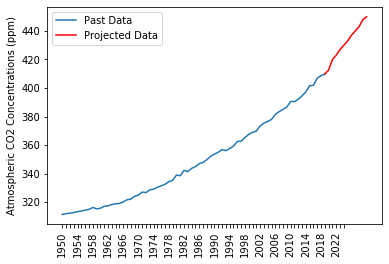

In [11]:
co2 = pd.read_excel("co2ppm.xlsx")

y1 = co2['co2_ppm'].loc[:69]
y2 = co2['co2_ppm'].loc[69:]
plt.plot(co2['co2_ppm'].loc[:69], label="Past Data")
plt.plot(co2['co2_ppm'].loc[69:], label="Projected Data", color='red')
plt.xticks(np.arange(75), range(1950, 2030), rotation=90)
ax=plt.gca()
[label.set_visible(False) for (index,label) in enumerate(ax.xaxis.get_ticklabels()) if index % 4 != 0]
plt.legend(loc="upper left")
plt.ylabel("Atmospheric CO2 Concentrations (ppm)")
annual_co2 = co2.set_index('Year')
print(annual_co2)

In [12]:
temp_co2 = pd.merge(all_temps, co2, on='Year')
temp_co2

,Year,April Avg Temps,May Avg Temps,June Avg Temps,July Avg Temps,August Avg Temps,September Avg Temps,October Avg Temps,co2_ppm
0,1950,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333,311.30
1,1951,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778,311.80
2,1952,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444,312.20
3,1953,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556,312.60
4,1954,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556,313.20
...,...,...,...,...,...,...,...,...,...
65,2015,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333,401.59
66,2016,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556,401.86
67,2017,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556,406.87
68,2018,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778,408.68


In [40]:
def format_mth_pcp(mth):
    mth = mth.drop(mth.index[:4])
    mth.columns = ['Year', 'Average Precipitation (mm)']
    mth['Year'] = mth['Year'].str[:4].astype(int)
    mth['Average Precipitation (mm)'] = mth['Average Precipitation (mm)'].apply(lambda x: float(x)*25.4)
    return mth

In [41]:
april_pcp = pd.read_csv('362-pcp-1-4-1950-2019.csv')
april_pcp = april_pcp.drop(' April', axis=1)
april_pcp = format_mth_pcp(april_pcp)
april_pcp.columns = ['Year', "April Avg Precipitation (mm)"]

In [42]:
may_pcp = pd.read_csv('362-pcp-1-5-1950-2019.csv')
may_pcp = may_pcp.drop(' May', axis=1)
may_pcp = format_mth_pcp(may_pcp)
may_pcp.columns = ['Year', "May Avg Precipitation (mm)"]

In [43]:
june_pcp = pd.read_csv('362-pcp-1-6-1950-2019.csv')
june_pcp = june_pcp.drop(' June', axis=1)
june_pcp = format_mth_pcp(june_pcp)
june_pcp.columns = ['Year', "June Avg Precipitation (mm)"]

In [44]:
july_pcp = pd.read_csv('362-pcp-1-7-1950-2019.csv')
july_pcp = july_pcp.drop(' July', axis=1)
july_pcp = format_mth_pcp(july_pcp)
july_pcp.columns = ['Year', "July Avg Precipitation (mm)"]

In [45]:
august_pcp = pd.read_csv('362-pcp-1-8-1950-2019.csv')
august_pcp = august_pcp.drop(' August', axis=1)
august_pcp = format_mth_pcp(august_pcp)
august_pcp.columns = ['Year', "August Avg Precipitation (mm)"]

In [46]:
september_pcp = pd.read_csv('362-pcp-1-9-1950-2019.csv')
september_pcp = september_pcp.drop(' September', axis=1)
september_pcp = format_mth_pcp(september_pcp)
september_pcp.columns = ['Year', "September Avg Precipitation (mm)"]

In [47]:
october_pcp = pd.read_csv('362-pcp-1-10-1950-2019.csv')
october_pcp = october_pcp.drop(' October', axis=1)
october_pcp = format_mth_pcp(october_pcp)
october_pcp.columns = ['Year', "October Avg Precipitation (mm)"]

In [48]:
all_pcp = pd.merge(april_pcp, may_pcp, on="Year")
all_pcp = pd.merge(all_pcp, june_pcp, on="Year")
all_pcp = pd.merge(all_pcp, july_pcp, on="Year")
all_pcp = pd.merge(all_pcp, august_pcp, on='Year')
all_pcp = pd.merge(all_pcp, september_pcp, on='Year')
all_pcp = pd.merge(all_pcp, october_pcp, on="Year")

In [49]:
climate_data = pd.merge(all_pcp, temp_co2, on='Year')
climate_data

,Year,April Avg Precipitation (mm),May Avg Precipitation (mm),June Avg Precipitation (mm),July Avg Precipitation (mm),August Avg Precipitation (mm),September Avg Precipitation (mm),October Avg Precipitation (mm),April Avg Temps,May Avg Temps,June Avg Temps,July Avg Temps,August Avg Temps,September Avg Temps,October Avg Temps,co2_ppm
0,1950,83.566,101.854,111.760,121.666,87.376,82.550,41.656,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333,311.30
1,1951,90.424,89.916,149.098,111.760,105.156,82.296,68.580,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778,311.80
2,1952,75.184,89.154,98.806,86.106,97.028,44.704,11.938,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444,312.20
3,1953,90.932,99.060,96.266,89.662,58.166,35.052,26.670,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556,312.60
4,1954,91.948,87.122,103.886,62.484,120.650,54.102,102.870,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556,313.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2015,89.916,133.858,167.640,130.810,95.250,76.200,56.642,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333,401.59
66,2016,92.710,107.950,83.058,136.398,148.336,111.252,59.436,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556,401.86
67,2017,120.904,131.572,98.298,102.616,104.140,54.356,106.934,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556,406.87
68,2018,68.326,100.330,149.098,94.742,127.508,141.478,96.520,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778,408.68


In [56]:
soy_yield = pd.read_excel('annual_midwest_soybean_yield.xlsx')
all_data = pd.merge(climate_data, soy_yield, on = 'Year')

In [57]:
all_data

,Year,April Avg Precipitation (mm),May Avg Precipitation (mm),June Avg Precipitation (mm),July Avg Precipitation (mm),August Avg Precipitation (mm),September Avg Precipitation (mm),October Avg Precipitation (mm),April Avg Temps,May Avg Temps,June Avg Temps,July Avg Temps,August Avg Temps,September Avg Temps,October Avg Temps,co2_ppm,Soybean Yield (bushels/acre)
0,1950,83.566,101.854,111.760,121.666,87.376,82.550,41.656,6.611111,15.944444,20.777778,21.611111,20.444444,17.500000,13.833333,311.30,20.2
1,1951,90.424,89.916,149.098,111.760,105.156,82.296,68.580,8.111111,16.944444,19.555556,22.833333,21.777778,16.333333,11.777778,311.80,19.8
2,1952,75.184,89.154,98.806,86.106,97.028,44.704,11.938,10.388889,15.888889,23.666667,24.277778,22.111111,18.444444,8.944444,312.20,19.3
3,1953,90.932,99.060,96.266,89.662,58.166,35.052,26.670,7.833333,16.388889,23.166667,23.833333,23.166667,18.611111,14.055556,312.60,19.7
4,1954,91.948,87.122,103.886,62.484,120.650,54.102,102.870,12.000000,13.611111,22.611111,25.055556,22.833333,19.333333,11.555556,313.20,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2015,89.916,133.858,167.640,130.810,95.250,76.200,56.642,11.611111,16.777778,21.666667,23.277778,21.722222,20.722222,12.833333,401.59,48.0
66,2016,92.710,107.950,83.058,136.398,148.336,111.252,59.436,10.888889,16.222222,22.888889,23.833333,23.444444,20.277778,14.055556,401.86,52.6
67,2017,120.904,131.572,98.298,102.616,104.140,54.356,106.934,12.222222,15.833333,21.888889,24.055556,21.000000,19.555556,13.055556,406.87,49.5
68,2018,68.326,100.330,149.098,94.742,127.508,141.478,96.520,6.000000,20.222222,23.166667,23.666667,22.944444,19.888889,10.777778,408.68,46.5


In [67]:
np_all_data = all_data.to_numpy()
X = np_all_data[:70, :16] 
y = np_all_data[:70, 16:]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

[[1950.           83.566       101.854      ...   17.5
    13.83333333  311.3       ]
 [1951.           90.424        89.916      ...   16.33333333
    11.77777778  311.8       ]
 [1952.           75.184        89.154      ...   18.44444444
     8.94444444  312.2       ]
 ...
 [2017.          120.904       131.572      ...   19.55555556
    13.05555556  406.87      ]
 [2018.           68.326       100.33       ...   19.88888889
    10.77777778  408.68      ]
 [2019.          107.442       177.292      ...   20.94444444
    10.61111111  409.73      ]]


,Actual,Predicted
0,46.5,53.766930
1,35.6,32.343305
2,19.8,19.168859
3,40.0,45.307962
4,34.2,34.077847
5,24.6,21.729938
6,32.5,33.655349
7,32.5,31.946754
8,25.2,28.327044
9,22.5,24.503722


In [68]:
#ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01) 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,27.5,30.245130
1,43.7,43.971770
2,25.0,23.210019
3,42.0,40.834631
4,32.5,33.943178
5,19.7,19.254486
6,32.5,31.549457
7,44.6,46.616045
8,43.0,38.626575
9,33.6,33.414124


In [70]:
#lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
coeff_used = np.sum(lasso.coef_!=0)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.4,29.645059
1,30.0,33.760330
2,27.1,26.190704
3,24.0,22.076357
4,25.2,23.796480
5,33.6,32.587105
6,39.5,38.320892
7,20.2,18.212776
8,48.0,39.435195
9,35.6,34.431715


In [71]:
#ElasticNet 
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.25, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,42.0,46.572975
1,39.5,36.874858
2,22.5,25.080529
3,27.1,26.991315
4,28.4,31.720570
5,46.5,51.513064
6,25.1,22.150074
7,26.5,26.151786
8,43.7,42.668139
9,34.7,33.148671


In [72]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.8,33.180205
1,19.7,18.897662
2,22.6,20.350971
3,30.0,35.473748
4,47.8,48.449122
5,43.7,42.140186
6,28.3,32.121661
7,32.5,34.465192
8,40.0,44.710545
9,26.3,28.621662


In [73]:
enet = ElasticNet(alpha=0.75, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,44.0,43.869090
1,30.0,34.706713
2,34.0,38.647417
3,32.5,33.353291
4,25.8,31.345256
5,36.2,37.920622
6,40.0,44.872083
7,49.0,37.659021
8,22.8,23.351362
9,23.9,23.427043
